In [276]:
import pipeline
import importlib

# Read data

In [366]:
importlib.reload(pipeline)

data = pipeline.read_csv('credit-data.csv')

Reading file...
Done


# Explore data

Data exploration...

Number of rows: 41016

Columns and types of data:
PersonID                                  int64
SeriousDlqin2yrs                          int64
RevolvingUtilizationOfUnsecuredLines    float64
age                                       int64
zipcode                                   int64
NumberOfTime30-59DaysPastDueNotWorse      int64
DebtRatio                               float64
MonthlyIncome                           float64
NumberOfOpenCreditLinesAndLoans           int64
NumberOfTimes90DaysLate                   int64
NumberRealEstateLoansOrLines              int64
NumberOfTime60-89DaysPastDueNotWorse      int64
NumberOfDependents                      float64
dtype: object


Statistics for selected variables:
count    41016.000000
mean        51.683489
std         14.746880
min         21.000000
25%         41.000000
50%         51.000000
75%         62.000000
max        109.000000
Name: age, dtype: float64
Number of outliers (>4 standard dev):0


count     4

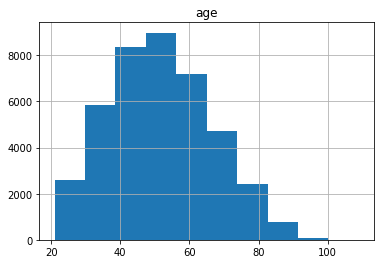

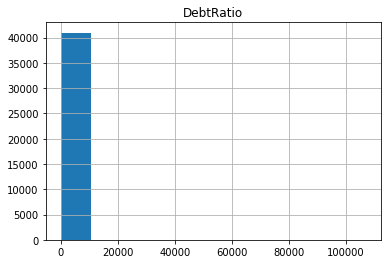

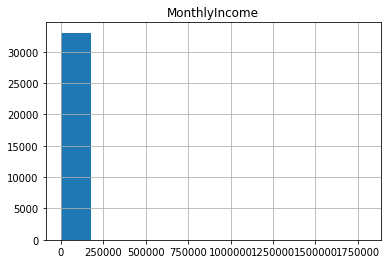

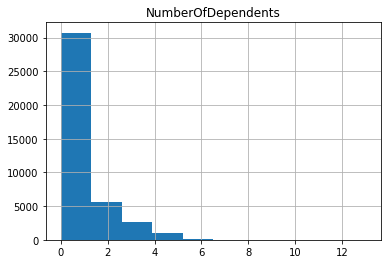

In [367]:
importlib.reload(pipeline)

stats_for_variables = ['age'
,'DebtRatio'
,'MonthlyIncome'
,'NumberOfDependents']

variables_for_correlation = ['DebtRatio','MonthlyIncome']

pipeline.explore_data(data, stats_for_variables, variables_for_correlation)



We can clearly see in the histograms that DebtRadio MontlyIncome have very big outliers.

# Process data

In [368]:
importlib.reload(pipeline)

columns_to_process = ['RevolvingUtilizationOfUnsecuredLines'
,'age'
,'NumberOfTime30-59DaysPastDueNotWorse'
,'DebtRatio'
,'MonthlyIncome'
,'NumberOfOpenCreditLinesAndLoans'
,'NumberOfTimes90DaysLate'
,'NumberRealEstateLoansOrLines'
,'NumberOfTime60-89DaysPastDueNotWorse'
,'NumberOfDependents']

data = pipeline.pre_process_data(data, columns_to_process)

# Datafram withou na values?
True if sum(data.isna().any()) == 0 else False

Pre processing data...
Done


True

# Create discrete feature

In [369]:
importlib.reload(pipeline)

data = pipeline.create_discrete_feature(data, 'age', [25,60],['young', 'adult','elder'], 'age_category')


Creating discrete feature based on continuous variable...
Done


# Create binary variable

In [370]:
importlib.reload(pipeline)

data = pipeline.create_binary_feature(data, 'zipcode', [60601,60644], 'zip_code_is_60601_or_60644')

Creating binary feature based on categorical variable...
Done


# Create train and test sets

In [371]:
importlib.reload(pipeline)

selected_features = ['RevolvingUtilizationOfUnsecuredLines'
,'age'
,'NumberOfTime30-59DaysPastDueNotWorse'
,'DebtRatio'
,'MonthlyIncome'
,'NumberOfOpenCreditLinesAndLoans'
,'NumberOfTimes90DaysLate'
,'NumberRealEstateLoansOrLines'
,'NumberOfTime60-89DaysPastDueNotWorse'
,'NumberOfDependents'
,'zip_code_is_60601_or_60644']

outcome ='SeriousDlqin2yrs'


x_train, x_test, y_train, y_test = pipeline.get_train_and_testing_sets(data4, selected_features, outcome)

Creating train and test sets...
Done


# Build Clasifier

In [372]:
importlib.reload(pipeline)

logistic_clasifier = pipeline.build_classifier('LogisticRegression', x_train, y_train)

Creating LogisticRegression classifier...
Done


# Evaluate Classifier

In [373]:
importlib.reload(pipeline)

pipeline.evaluate_classifier(logistic_clasifier,x_test,y_test,0.5)


Evaluating classifier...
(Threshold: 0.5), Predicted correct 10477 out of 12305, the accuracy is 0.851
Done
